### Importando Bibliotecas Necessárias

In [1]:
%pip install scikit-learn
%pip install seaborn
%pip install pandas
%pip install tabulate
%pip install graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

random_seed = 1337

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/b2/08/3696c9426c65e8a27831c7270d8df0facc023b65aee318f18cf9dacf10f3/scikit_learn-1.4.1.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/ae/e2/4dea6313ef2b38442fccbbaf4017e50a6c3c8a50e8ee9b512783e5c90409/joblib-1.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/1e/84/ccd9b08653022b7785b6e3ee070ffb2825841e0dc119be22f0840b2b35cb/threadpoolctl-3.4.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 25.5 MB/s eta 0:00:00m eta 0:00:010:00:01
Using cached joblib-1.4.0-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.4.0-py3-none-any.whl (17 kB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to us

### Carregando e Formatando o Dataset (Autism-Adult-Data.arff)

In [2]:
from scipy.io.arff import loadarff

file_path = "./datasets/Autism-Adult-Data.arff"

raw_data = loadarff(file_path)
df = pandas.DataFrame(raw_data[0])

df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'1',b'1',b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'0',...,b'f',b'White-European',b'no',b'no',b'United States',b'no',6.0,b'18 and more',b'Self',b'NO'
1,b'1',b'1',b'0',b'1',b'0',b'0',b'0',b'1',b'0',b'1',...,b'm',b'Latino',b'no',b'yes',b'Brazil',b'no',5.0,b'18 and more',b'Self',b'NO'
2,b'1',b'1',b'0',b'1',b'1',b'0',b'1',b'1',b'1',b'1',...,b'm',b'Latino',b'yes',b'yes',b'Spain',b'no',8.0,b'18 and more',b'Parent',b'YES'
3,b'1',b'1',b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'1',...,b'f',b'White-European',b'no',b'yes',b'United States',b'no',6.0,b'18 and more',b'Self',b'NO'
4,b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',...,b'f',b'?',b'no',b'no',b'Egypt',b'no',2.0,b'18 and more',b'?',b'NO'


# Replacing byte values and correcting column name

In [3]:
def extract_string(b: bytes):
    if type(b) != float:
        return b.decode('utf-8')
    return b

df = df.rename(columns = {"austim": "autism", "contry_of_res": "country"})

df = df.applymap(lambda x: extract_string(x))

df = df.replace('1', 1)
df = df.replace('0', 0)
df = df.replace('yes', 1)
df = df.replace('no', 0)
df = df.replace('YES', 1)
df = df.replace('NO', 0)


df.head()

/tmp/ipykernel_20300/345309626.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: extract_string(x))


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,autism,country,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,0,0,United States,0,6.0,18 and more,Self,0
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,0,1,Brazil,0,5.0,18 and more,Self,0
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,1,1,Spain,0,8.0,18 and more,Parent,1
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,0,1,United States,0,6.0,18 and more,Self,0
4,1,0,0,0,0,0,0,1,0,0,...,f,?,0,0,Egypt,0,2.0,18 and more,?,0


# Removendo valores nulos

In [4]:
df = df.dropna()

# Aumentando registros de label positiva

In [5]:
df.groupby("autism")["autism"].count()

autism
0    611
1     91
Name: autism, dtype: int64

In [6]:
positive_labels = df[df["autism"] == 1]

df = pandas.concat([df, positive_labels, positive_labels])
df = df.sample(frac=1)
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,autism,country,used_app_before,result,age_desc,relation,Class/ASD
546,1,0,1,1,0,0,0,0,0,1,...,f,White-European,0,1,United Kingdom,0,4.0,18 and more,Self,0
519,0,0,1,1,0,0,0,0,0,1,...,m,Middle Eastern,0,0,Egypt,0,3.0,18 and more,Self,0
216,1,0,0,0,0,0,1,1,0,1,...,f,?,1,0,United Arab Emirates,0,4.0,18 and more,?,0
304,1,1,1,1,1,0,0,0,1,0,...,m,Asian,0,0,Afghanistan,0,6.0,18 and more,Self,0
438,1,1,0,0,0,0,0,1,0,1,...,f,?,0,0,Jordan,0,4.0,18 and more,?,0


In [7]:
df.groupby("autism")["autism"].count()


autism
0    611
1    273
Name: autism, dtype: int64

# heatmap/matriz de confusão do questionário

[[465 146]
 [144 129]]


<Axes: >

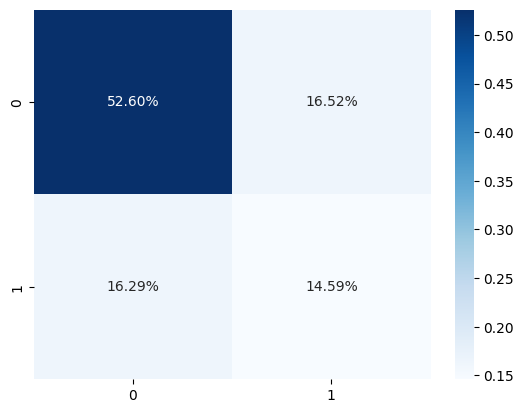

In [8]:
cf_matrix = confusion_matrix(df["autism"], df["Class/ASD"])
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

# Selecionando features úteis e label

In [9]:
useful_features = [
    "A1_Score",
    "A2_Score",
    "A3_Score",
    "A4_Score",
    "A5_Score",
    "A6_Score",
    "A7_Score",
    "A8_Score",
    "A9_Score",
    "A10_Score",
    "age",
    # "gender",
    # "ethnicity",
    "jundice",
    # "country",
    "used_app_before",
    "relation"
]

label = ["autism"]

df = df[useful_features + label]

### Dividindo o Dataset em Teste (20%) e Treino (80%)

In [10]:
data = df.iloc[:, df.columns != label[0]] 
target = df.iloc[:, -1].values
XTrain, XTest, YTrain, YTest = train_test_split(data, target, test_size=0.2, random_state=random_seed)

### Treinamento e Previsões

# Definindo otimização de parâmetros

In [11]:
def search(model, model_parameters): 
    """ """
    categorical_features = [
        "A1_Score",
        "A2_Score",
        "A3_Score",
        "A4_Score",
        "A5_Score",
        "A6_Score",
        "A7_Score",
        "A8_Score",
        "A9_Score",
        "A10_Score",
        # "gender",
        # "ethnicity",
        "jundice",
        # "country",
        "used_app_before",
        "relation"
    ]
    categorical_transformer = Pipeline(
        steps=[
            ("encoder", OneHotEncoder(handle_unknown="ignore"))
        ]
    )

    preprocessor = ColumnTransformer(
        transformers=[
            ("cat", categorical_transformer, categorical_features)
        ]
    )

    model_pipeline = Pipeline([
        ('prep', preprocessor),
        ('clf', model)
    ])
    n_jobs = -1
    folds = 10

    randomized_search = GridSearchCV(
        model_pipeline,
        model_parameters,
        n_jobs=n_jobs,
        cv=folds
    )

    randomized_search.fit(XTrain, YTrain)

    return randomized_search

In [12]:
dt_parameters = {
    "clf__criterion": ["gini", "entropy", "log_loss"],
    "clf__splitter": ["best", "random"],
    "clf__max_depth": range(3, 50),
    "clf__min_samples_split": range(2, 10)
}

dt_gridsearch = search(DecisionTreeClassifier(random_state=random_seed), dt_parameters)
dt_best_score = dt_gridsearch.best_score_
dt_best_params = dt_gridsearch.best_params_

print(f"Best score on the decision tree otimization: {dt_best_score}")
print("Best params:")
for key, value in dt_best_params.items():
    print(f"{key}: {value}")

Best score on the decision tree otimization: 0.8077062374245472
Best params:
clf__criterion: gini
clf__max_depth: 16
clf__min_samples_split: 2
clf__splitter: random


### Avaliando a Decision tree otimizada

[[99 25]
 [10 43]]


<Axes: >

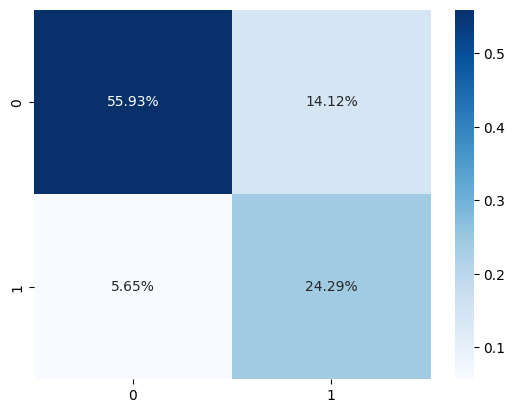

In [13]:
dt = dt_gridsearch.best_estimator_

y_pred = dt.predict(XTest)

cf_matrix = confusion_matrix(YTest, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

<Axes: >

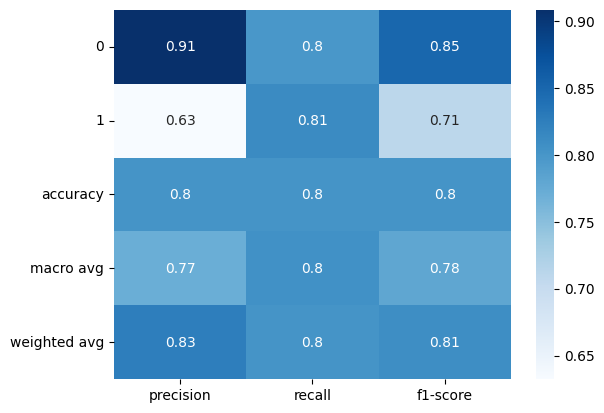

In [14]:
# RESULTADOS 1
clf_report1 = classification_report(YTest, y_pred, output_dict=True)
sns.heatmap(pandas.DataFrame(clf_report1).iloc[:-1, :].T, annot=True, cmap='Blues')

# Features mais relevantes para Decision Tree

30 30
Feature Importances:


<Axes: xlabel='feature', ylabel='importance'>

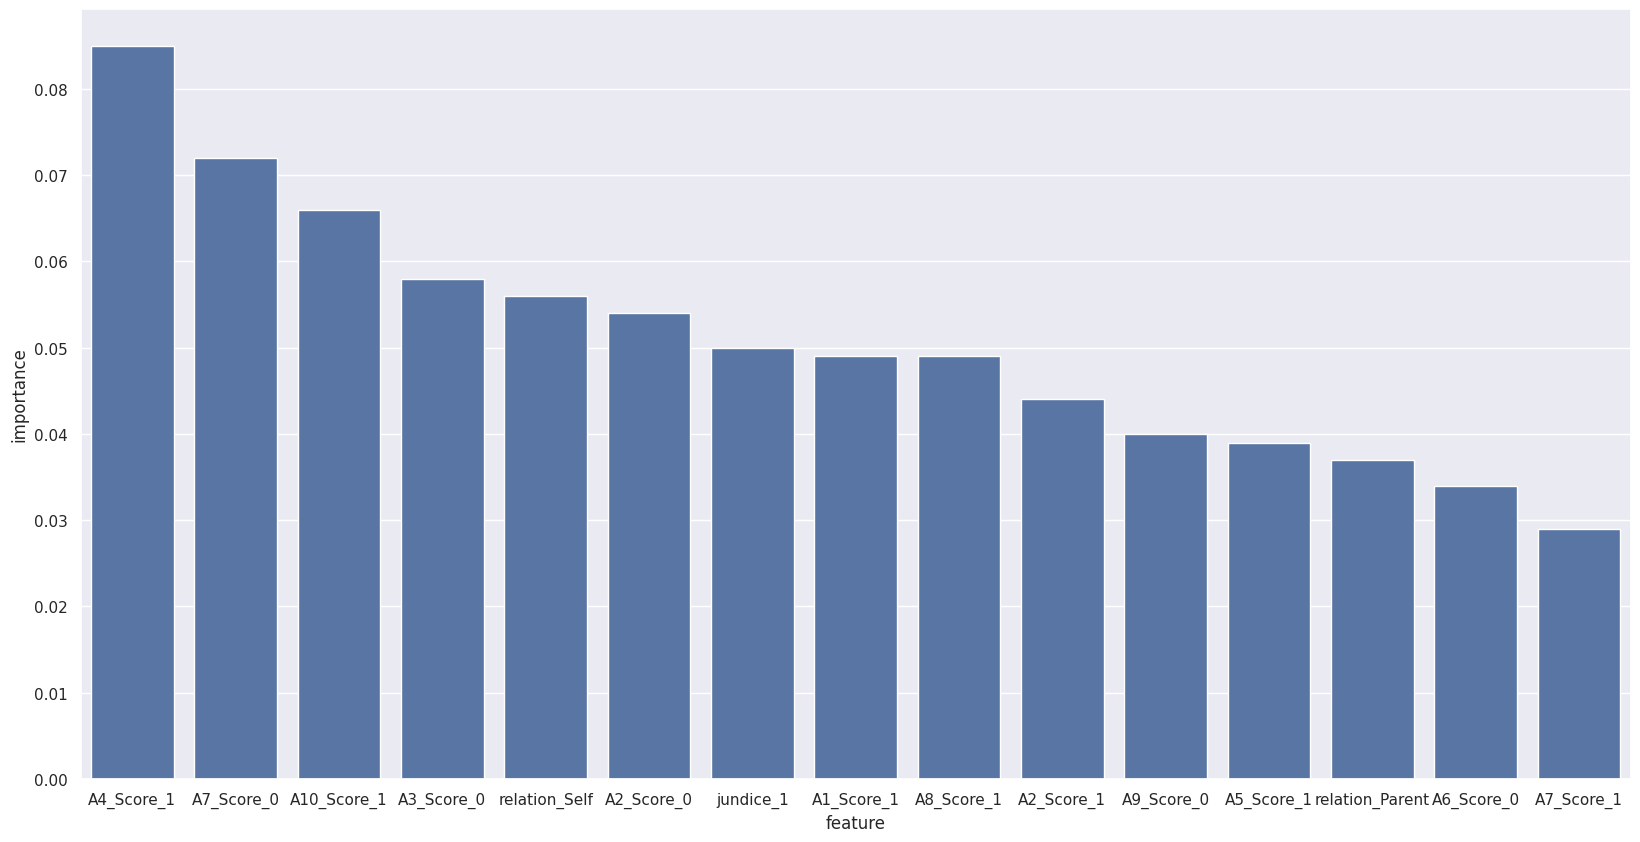

In [15]:
features = dt.named_steps["prep"].transformers_[0][1].steps[0][1].get_feature_names_out()
importances = dt.steps[1][1].feature_importances_

print(len(features), len(importances))

print("Feature Importances:")
feature_importances = []
for i, feature in enumerate(features):
    feature_importances.append({
        "feature": feature,
        "importance": round(importances[i], 3)
    })

feature_importances = sorted(feature_importances, key=lambda x: x["importance"], reverse=True)
feature_importances = feature_importances[:15]

sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(data=pandas.DataFrame(feature_importances), x="feature", y="importance")

# Decision Tree

In [16]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt.steps[1][1], out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [19]:
people = {
    'andre': {
        "A1_Score": 1,
        "A2_Score": 1,
        "A3_Score": 0,
        "A4_Score": 1,
        "A5_Score": 1,
        "A6_Score": 1,
        "A7_Score": 0,
        "A8_Score": 1,
        "A9_Score": 1,
        "A10_Score": 1,
        # "gender",
        # "ethnicity",
        "jundice": 0,
        # "country",
        "used_app_before": 1,
        "relation": 0
    },
    'clara': {
        "A1_Score": 0,
        "A2_Score": 0,
        "A3_Score": 1,
        "A4_Score": 1,
        "A5_Score": 1,
        "A6_Score": 0,
        "A7_Score": 0,
        "A8_Score": 0,
        "A9_Score": 0,
        "A10_Score": 0,
        # "gender",
        # "ethnicity",
        "jundice": 0,
        # "country",
        "used_app_before": 0,
        "relation": 1
    },
    'raul': {
        "A1_Score": 1,
        "A2_Score": 0,
        "A3_Score": 1,
        "A4_Score": 1,
        "A5_Score": 0,
        "A6_Score": 0,
        "A7_Score": 1,
        "A8_Score": 0,
        "A9_Score": 0,
        "A10_Score": 0,
        # "gender",
        # "ethnicity",
        "jundice": 0,
        # "country",
        "used_app_before": 0,
        "relation": 0
    },
    'pedro': {
        "A1_Score": 1,
        "A2_Score": 1,
        "A3_Score": 0,
        "A4_Score": 1,
        "A5_Score": 1,
        "A6_Score": 1,
        "A7_Score": 0,
        "A8_Score": 0,
        "A9_Score": 1,
        "A10_Score": 1,
        # "gender",
        # "ethnicity",
        "jundice": 0,
        # "country",
        "used_app_before": 0,
        "relation": 0
    },
    'jota': {
        "A1_Score": 1,
        "A2_Score": 1,
        "A3_Score": 0,
        "A4_Score": 1,
        "A5_Score": 1,
        "A6_Score": 1,
        "A7_Score": 0,
        "A8_Score": 1,
        "A9_Score": 1,
        "A10_Score": 0,
        # "gender",
        # "ethnicity",
        "jundice": 0,
        # "country",
        "used_app_before": 0,
        "relation": 1
    },
    'vini': {
        "A1_Score": 0,
        "A2_Score": 1,
        "A3_Score": 1,
        "A4_Score": 1,
        "A5_Score": 0,
        "A6_Score": 0,
        "A7_Score": 0,
        "A8_Score": 1,
        "A9_Score": 0,
        "A10_Score": 1,
        # "gender",
        # "ethnicity",
        "jundice": 0,
        # "country",
        "used_app_before": 0,
        "relation": 1
    },
    'dudu': {
        "A1_Score": 1,
        "A2_Score": 1,
        "A3_Score": 1,
        "A4_Score": 0,
        "A5_Score": 0,
        "A6_Score": 0,
        "A7_Score": 0,
        "A8_Score": 1,
        "A9_Score": 0,
        "A10_Score": 0,
        # "gender",
        # "ethnicity",
        "jundice": 0,
        # "country",
        "used_app_before": 0,
        "relation": 0
    },
    'caio': {
        "A1_Score": 0,
        "A2_Score": 0,
        "A3_Score": 1,
        "A4_Score": 1,
        "A5_Score": 0,
        "A6_Score": 0,
        "A7_Score": 0,
        "A8_Score": 0,
        "A9_Score": 0,
        "A10_Score": 0,
        # "gender",
        # "ethnicity",
        "jundice": 0,
        # "country",
        "used_app_before": 1,
        "relation": 0
    },
    'jambigade': {
        "A1_Score": 1,
        "A2_Score": 0,
        "A3_Score": 1,
        "A4_Score": 1,
        "A5_Score": 0,
        "A6_Score": 1,
        "A7_Score": 0,
        "A8_Score": 1,
        "A9_Score": 0,
        "A10_Score": 0,
        # "gender",
        # "ethnicity",
        "jundice": 0,
        # "country",
        "used_app_before": 1,
        "relation": 0
    }
}

In [32]:
def predict_dict(d: dict):
    # data_df = pandas.DataFrame([d])
    # data_df.reset_index(drop=True, inplace=True)
    # print(data_df.dtypes)
    # print(data_df.head())
    data_df = np.array([value for value in d.values()])
    print(data_df)
    # preprocessor = dt['prep']
    # print(preprocessor)

    # data_df = preprocessor.transform(data_df)

    prediction = dt.predict(data_df)
    return prediction

pred = predict_dict(people['andre'])
pred

[1 1 0 1 1 1 0 1 1 1 0 1 0]


ValueError: X does not contain any features, but ColumnTransformer is expecting 14 features

In [20]:
def predict_dict(d: dict):
    data_df = pd.DataFrame([d])
    preprocessor = dt['prep']
    print(preprocessor)
    transformed_data = preprocessor.transform(data_df)
    prediction = dt.predict(transformed_data)
    return prediction

pred = predict_dict(people['andre'])

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['A1_Score', 'A2_Score', 'A3_Score',
                                  'A4_Score', 'A5_Score', 'A6_Score',
                                  'A7_Score', 'A8_Score', 'A9_Score',
                                  'A10_Score', 'jundice', 'used_app_before',
                                  'relation'])])


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
print("autistic checker 2000:")

for person, data in people.items():
    print(f"Suspeito: {person}")
    total = 0
    for i in range(10):
        key = f"A{i+1}_Score"
        total += data[key]
    
    print(f"Pontuação no teste: {total}")


    print("=" * 30)

